<a href="https://colab.research.google.com/github/AnjanDutta/EEEM068/blob/main/Notebooks/Neural_Network_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1 style="text-align: center">EEEM068 - Applied Machine Learning</H1>
<H1 style="text-align: center">Workshop 03</H1>
<H1 style="text-align: center">Neural Network Tutorial</H1>

## Introduction
In this workshop, we will implement a multi-layered perceptron (MLP) to classify digits. Specifically we will consider the MNIST dataset for training and testing our model. For this workshop, we are going to use [PyTorch](https://pytorch.org/), the cutting-edge deep learning framework to complete our task.

## MNIST Dataset

The MNIST dataset contains 70000 black and white, hand-written digits (hence 10 classes or categories: 0, 1, ..., 9) images that are of size 28x28 pixels. This is a dataset that is typically used for demonstrations of machine learning models, and as a first dataset to test new types of models. The dataset is further split into train, validation and test sets. More details on the MNIST dataset can be found here: http://yann.lecun.com/exdb/mnist/

### Dataset class
Torchvision (a part of the bigger PyTorch project/package) provides many built-in datasets in the `torchvision.datasets` module, as well as utility classes for building your own datasets. All datasets are subclasses of `torch.utils.data.Dataset` i.e, they have `__getitem__` and `__len__` methods implemented. Hence, they can all be passed to a `torch.utils.data.DataLoader` which can load multiple samples in parallel using `torch.multiprocessing` workers. More details on built-in datasets could be found in the [documentation](https://pytorch.org/vision/stable/datasets.html#).

MNIST dataset is one of the many built-in datasets available via the torchvision package. In this workshop, we will use that MNIST dataset from `torchvision.datasets`.

**Note:** If a dataset is not available within the built-in collection, it has to be implemented from scratch, which we will discuss in a future workshop.

### Visualization
Lets download the MNIST dataset from PyTorch's collection of dataset and plot some digits for visualization.

100%|████████████████████████████████████████| 9.91M/9.91M [00:02<00:00, 4.46MB/s]
100%|█████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 343kB/s]
100%|████████████████████████████████████████| 1.65M/1.65M [00:00<00:00, 2.73MB/s]
100%|████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 1.09MB/s]


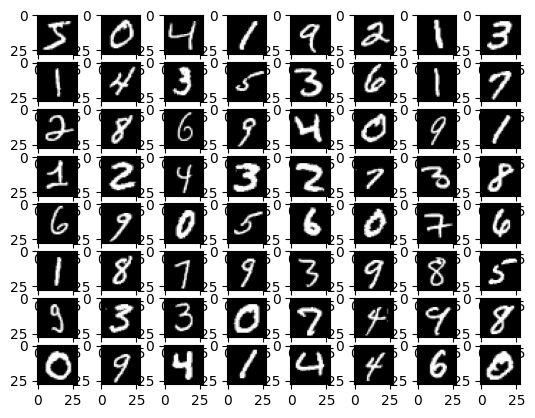

In [2]:
import matplotlib.pyplot as plt
from torchvision import datasets
mnist_train = list(datasets.MNIST('data/', train=True, download=True))
# plot the first 64 images from the MNIST training data
for k, (image, label) in enumerate(mnist_train[:64]):
    plt.subplot(8, 8, k+1)
    plt.imshow(image, cmap='gray')

### Image transformations

Before inputing an image to a neural network, it is often needed to transform or process the image into a specific form. For example, an image needs to be converted into numerical pixels features form before inputting them into a network. The `torchvision.transforms` module of `torchvision` provides such common image transformations. They can be chain together using `Compose`. More details on image transformation functions using `Torchvision` can be found in the [documentation](https://pytorch.org/vision/stable/transforms.html).

#### Image to Tensor

Before inputing images to a neural network, images should be transformed into tensors. PyTorch provides `transforms.ToTensor()` function for us to convert an image into numerical pixel features. The tensor still preserves the 2D geometry of the image, i.e. we still get a matrix of 1x28x28 shape. More details can be found in its [documentation](https://pytorch.org/vision/main/generated/torchvision.transforms.ToTensor.html#totensor).

In [7]:
from torchvision import transforms
# transform the image data type to a 28x28 matrix of numbers
# convert the last image we saw into a tensor
img_tensor = transforms.ToTensor()(image)

# print the shape of the resulting tensor
img_tensor.shape

torch.Size([1, 28, 28])

In [8]:
# print the values of img_tensor
print(img_tensor)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

#### Normalization

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric rows / columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges. In neural network, it is a good practice to work with normalized data. PyTorch provides the `transforms.Normalize()` function which normalises the input. Please check its [documentation](https://pytorch.org/vision/main/generated/torchvision.transforms.Normalize.html#normalize) for more details.

#### Combination
Any number of transformations can be chained together using `Compose`. More details are in the [documentation](https://pytorch.org/vision/main/generated/torchvision.transforms.Compose.html#compose).

In [11]:
# define how image should be transformed (normalize with z-score)
image_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,))])

### Image transformation via dataset class

Combination of a set of transformations can be applied via the dataset class by passing the transformations to the `tranform` argument of the dataset class.

In [12]:
# Since MNIST dataset is already implemented within 'torchvision.datasets', we
# don't need to implement seperate dataset for MNIST. Below is how we can use
# the MNIST dataset respectively for training and testing
train_dataset = datasets.MNIST('data/', train=True, download=True,
                               transform=image_transform)
test_dataset = datasets.MNIST('data/', train=False, transform=image_transform)

### Data loader

Once we have the dataset ready, we can create the dataloader as follows. It is recommended to use smaller batch size for training and larger batch size during test time, because during training lot of intermediate variables need to be kept in the GPU memory for processing.

In [14]:
import torch
import torchvision
## Create dataloader, in PyTorch, we feed the trainer data with dataloader
## We create dataloader with dataset from torchvision, and we don't have to
## download it seperately, all automatically done

# Define batch size, batch size is how much data you feed for training in one iteration
batch_size_train = 256 # We use a small batch size here for training
batch_size_test = 1024 #

#data loaders
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size_train,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size_test,
                                          shuffle=True)

## Model
We need to define trainable layers and put them inside a model. Have a look on the [documentation](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#module) of `nn.Module` and read more about different layers and functionalities of PyTorch there. In this model, we are going to use the following functions or modules:

* `nn.Sequential()`: It is a sequential container. Modules will be added to it in the order they are passed in the constructor. Please check the [documentation](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential) for more details.

* `nn.Linear()`: It is a module that applies a linear transformation to the incoming data. More details can be found in its [documentation](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#linear).

* `nn.ReLU()`: It is also a module that applies element-wise the rectified linear unit function. Its [documentation](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#relu) can explain more.

* `nn.Dropout()`: This module randomly zeroes some of the elements of the input tensor with probability `p`. Check the [documentation](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#dropout) for more details.

In [15]:
## Now we can start building our model
## We first import the pytorch nn module
import torch.nn as nn
## Then define the model class
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(in_features=784, out_features=4096, bias=True),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(in_features=4096, out_features=4096, bias=True),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(in_features=4096, out_features=num_classes, bias=True)
        )

    def forward(self, x):
        # B x C x H x W -> B x C*H*W
        x = x.reshape(x.shape[0], -1)
        x = self.classifier(x)
        return x

## Initialization
Please read the comments and understand the purpose of different lines of code.

#### Model
We will initialize the model, transfer to the desired device and set the parameters to receive gradients.

In [18]:
# define the model, note the parameter is the number of class
model = Net(10)
device = torch.device("cuda" if torch.cuda.is_available() else 
                      "mps" if torch.backends.mps.is_available() else 
                      "cpu")
# map to device
model = model.to(device) # `model.cuda()` will also do the same job
# make all the parameters in the model trainable
for param in model.parameters():
    param.requires_grad = True

#### Optimizer for Stochastic Gradient Descent
For updating the parameters, PyTorch provides the package `torch.optim` that has most popular optimizers implemented. We will discuss the specific optimizers and their differences later in the course, but will for now use the simplest of them: `torch.optim.SGD`. Stochastic Gradient Descent updates parameters by multiplying the gradients with a small constant, called learning rate, and subtracting those from the parameters (hence minimizing the loss). Therefore, we slowly move towards the direction of minimizing the loss. A good default value of the learning rate for a small network as ours is 0.1.

In [19]:
import torch.optim as optim
# define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)

The optimizer provides two useful functions: `optimizer.step()`, and `optimizer.zero_grad()`. The step function updates the parameters based on the gradients as explained above. The function `optimizer.zero_grad()` sets the gradients of all parameters to zero. While this function seems less relevant at first, it is a crucial pre-step before performing backpropagation. If we call the backward function on the loss while the parameter gradients are non-zero from the previous batch, the new gradients would actually be added to the previous ones instead of overwriting them. This is done because a parameter might occur multiple times in a computation graph, and we need to sum the gradients in this case instead of replacing them. Hence, remember to call `optimizer.zero_grad()` before calculating the gradients of a batch.

## Average Meter
It is a simple class for keeping training statistics, such as losses and accuracies etc. The `.val` field usually holds the statistics for the current batch, whereas the `.avg` field hold statistics for the current epoch.

In [ ]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

## Train and Test Functions

In [ ]:
import torch.nn.functional as F
from tqdm.notebook import tqdm

##define train function
def train_one_epoch(model, device, train_loader, optimizer):
    # average meter
    loss = AverageMeter()

    # switch to train mode
    model.train()

    # use tqdm for showing the status
    tk0 = tqdm(train_loader, total=int(len(train_loader)))

    # fetching data from data loader
    for batch_idx, (data, target) in enumerate(tk0):

        # pass the data to the device
        data, target = data.to(device), target.to(device)  # data, target = data.cuda(), target.cuda() will also do

        # sets the gradients of all parameters to zero
        optimizer.zero_grad()

        # compute the output by passing the input to the model
        output = model(data) # model.forward(data) will also do the same thing

        # compute cross entropy loss
        loss_this = F.cross_entropy(output, target)

        # perform backpropagation
        loss_this.backward()

        # update the parameters
        optimizer.step()

        # update the loss average meter
        loss.update(loss_this.item(), target.shape[0])

    print('Train: Average loss: {:.4f}\n'.format(loss.avg))

    return loss.avg

##define test function
def test(model, device, test_loader):
    # average meters
    loss = AverageMeter()
    acc = AverageMeter()

    # number of correctly classified instances
    correct = 0

    # switch to eval or test mode
    model.eval()

    # fetching data from data loader
    for data, target in test_loader:

        # pass the data to the device
        data, target = data.to(device), target.to(device)  # data, target = data.cuda(), target.cuda() will also do

        # since during testing, we don't need to compute gradient we compute
        # the output as follows with `torch.no_grad()`. This will save memory/computation
        with torch.no_grad():
            output = model(data)

        # compute cross entropy loss for checking overfitting or underfitting
        loss_this = F.cross_entropy(output, target)

        # get the index of the max log-probability
        pred = output.argmax(dim=1, keepdim=True)

        # compute how many of them are correct
        correct_this = pred.eq(target.view_as(pred)).sum().item()

        # sum the total correct classifications
        correct += correct_this

        # accuracy for this batch
        acc_this = correct_this/target.shape[0]*100.0

        # update the accuracy and loss average meter
        acc.update(acc_this, target.shape[0])
        loss.update(loss_this.item(), target.shape[0])

    print('Test: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        loss.avg, correct, len(test_loader.dataset), acc.avg))

## Training Loop
Training loop with logging of training loss. Perform testing after training the model for some epochs.

In [ ]:
# import tensorboard logger from PyTorch
from torch.utils.tensorboard import SummaryWriter
# create TensorBoard logger
writer = SummaryWriter('runs/mnist_experiment_1')
# number of epochs we decide to train
num_epoch = 5
for epoch in range(1, num_epoch + 1):
    epoch_loss = train_one_epoch(model, device, train_loader, optimizer)
    writer.add_scalar('training_loss', epoch_loss, global_step = epoch)
test(model, device, test_loader)

### Training loss curve

The TensorBoard file in the folder runs/mnist_experiment_1 now contains a training loss curve over number of epochs. To start the TensorBoard visualizer, simply run the following statements.

In [ ]:
# Load tensorboard extension for Jupyter Notebook, only need to start TB in the notebook
%load_ext tensorboard
%tensorboard --logdir runs/mnist_experiment_1

## Summary
Show the summary of the model. It shows the number of parameters in layerwise as well as the total number of parameters. It also shows the memories required for training the model.

In [ ]:
from torchsummary import summary
summary(model, (1, 28, 28))